<a href="https://colab.research.google.com/github/mahidhiman12/pytorch/blob/main/5_PyTorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a computer vision problem?

- Computer vision aims to give machines the ability to process and understand visual information from the world, just as humans do. This involves extracting meaningful information from images and videos, such as recognizing objects, understanding their relationships, and making decisions based on that understanding

- This involves tasks like object detection, image classification, image segmentation and scene understanding, often requiring complex algorithms and substantial datasets to achieve human-level performance

- Take a look at apple's machine learning research or tesla computer vision

- Essentially , anything you're able to see , you can potentially turn into a computer vision problem

## Inputs and Outputs of computer vision
Let's start with a multi-class classification problem:
  - So we wanted to take photos of different images of food and recognize what they were

  - We might start with a bunch of food images that have a height and width of some sort : eg - width = 224 , height = 224 , color channels = 3 (red , green , blue)

  - In computer vision, images are represented as numerical matrices, where each element in the matrix corresponds to a pixel's color or intensity value. For color images, this usually involves three matrices, one each for the red, green, and blue (RGB) color channels. Each value within these matrices represents the intensity of that color at a specific pixel location

  - We might numerically encode these , in other words , represent our images as a tensor , and this will be inputs to a machine learning algorithm

  - And in many cases , depending on what problem you're working on , an exiisting algorithm already exists for many of the most popular computer vision problems

  - And then you might fashion this machine learning algorithm to output the exact shapes you want

  - Our output will be predicted probabilities , the highest probability is more likely to be the answer according to the algorithm .

  - Eg:  We gave our model a picture of some food -> it will be converted into a numerical encoding first for example : [0.31 , 0.62 , 0.44] and the model will return outputs like : [0.97 , 0.0 , 0.03] where the first class is sushi , second is pizza , and third is burger so the highest value is first class hence we can say the picture was of a sushi

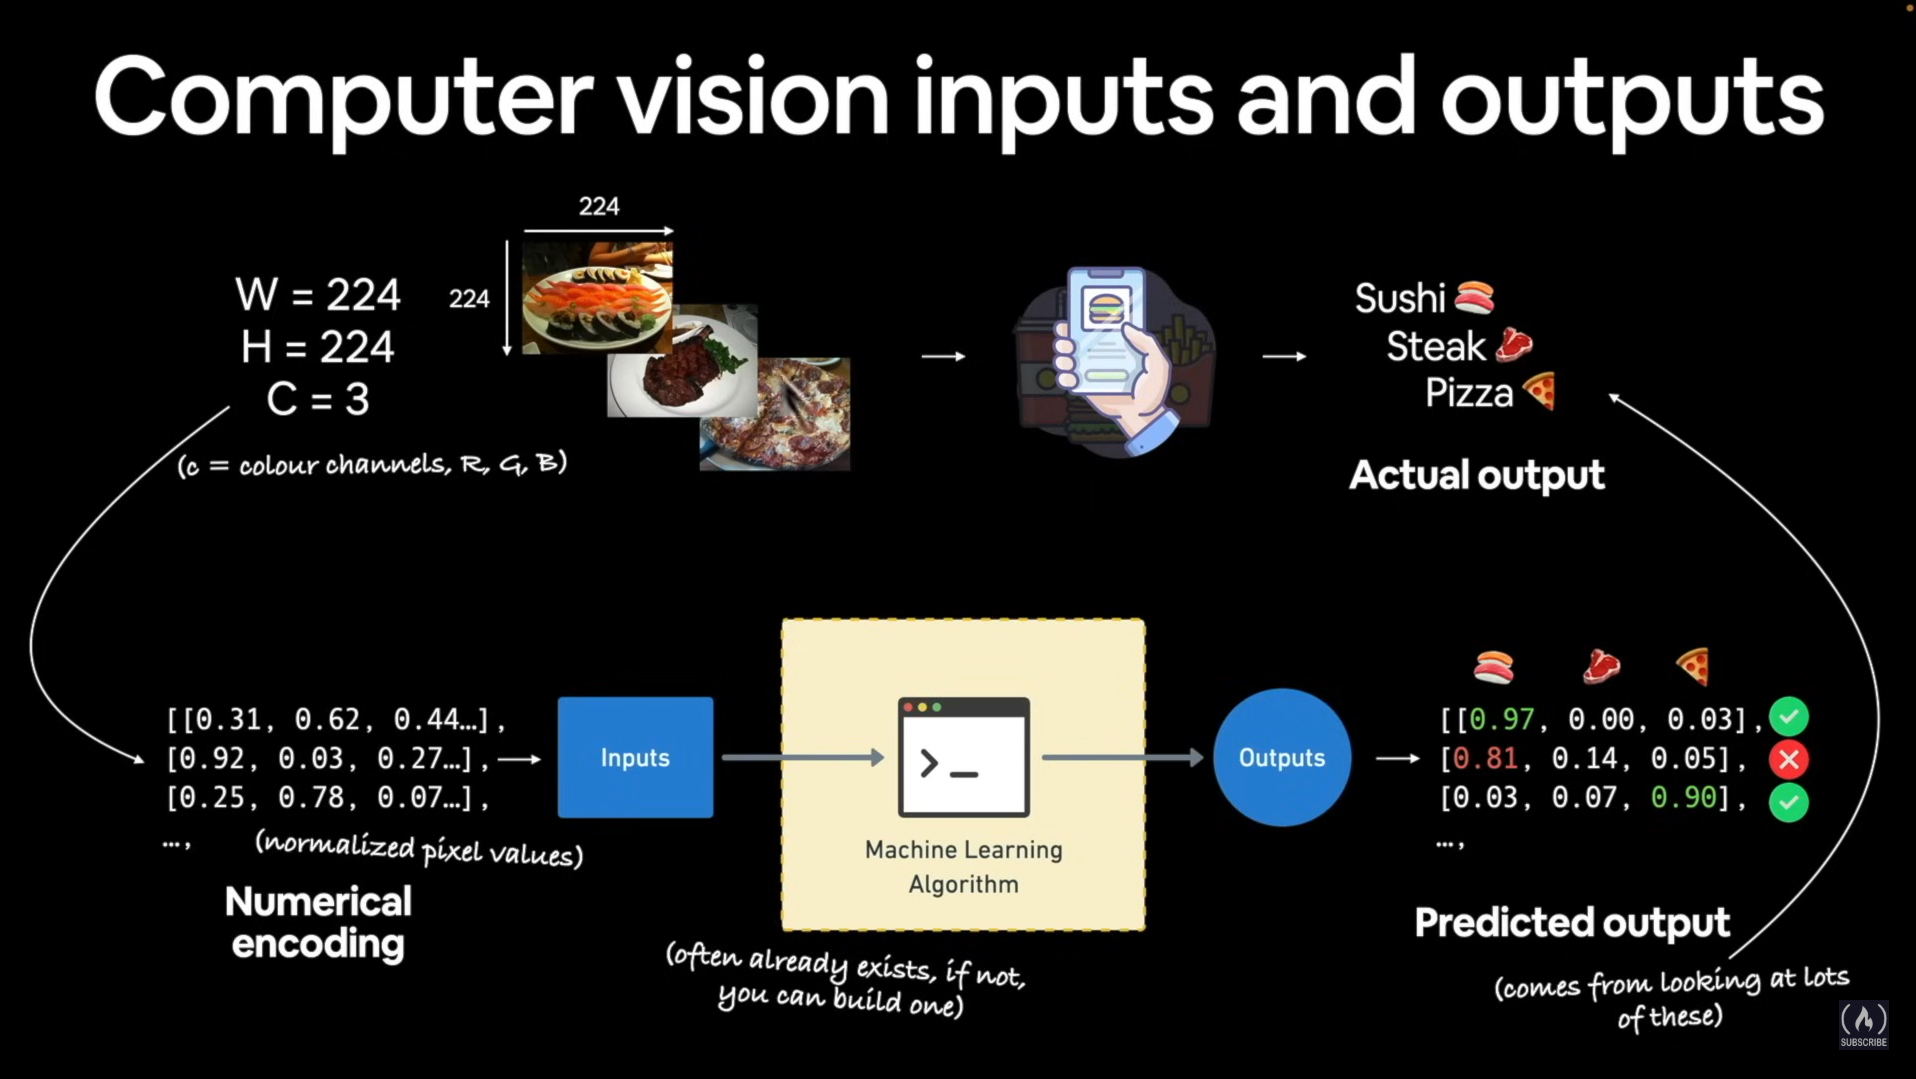

- The model that does this is often a **convolutional neural network (CNN)**

- You can use any other algo for this , but CNNs perform best with image data

- Although , there is the transformer architecture or deep learning model that also performs best with image data

An image can be represented as:

[batch_size , width , height , color_channels] (NHWC)

or

[batch_size , color_channels , height ,  width] (NCHW)

eg: [32 , 224 , 224 , 3]

or

 [32,3,224,224]

## What is a CNN?

- A convolutional neural network (CNN) is a type of artificial neural network that excels at processing grid-like data, particularly images. CNNs are used in various applications, including image recognition, natural language processing, and speech recognition. They are characterized by their use of convolutional layers, which employ filters to extract features from the input data, and pooling layers for dimensionality reduction

- Convolutional Layers:
These layers apply filters to the input data to detect features like edges, textures, or shapes. The filters slide across the input, performing convolution operations to produce feature maps

- Pooling Layers:
These layers reduce the spatial dimensions of the feature maps, which helps to reduce computational complexity and prevent overfitting. Common pooling operations include max pooling and average pooling

- Fully Connected Layers:
These layers, typically found at the end of the CNN, take the output from the convolutional and pooling layers and perform classification or regression tasks.

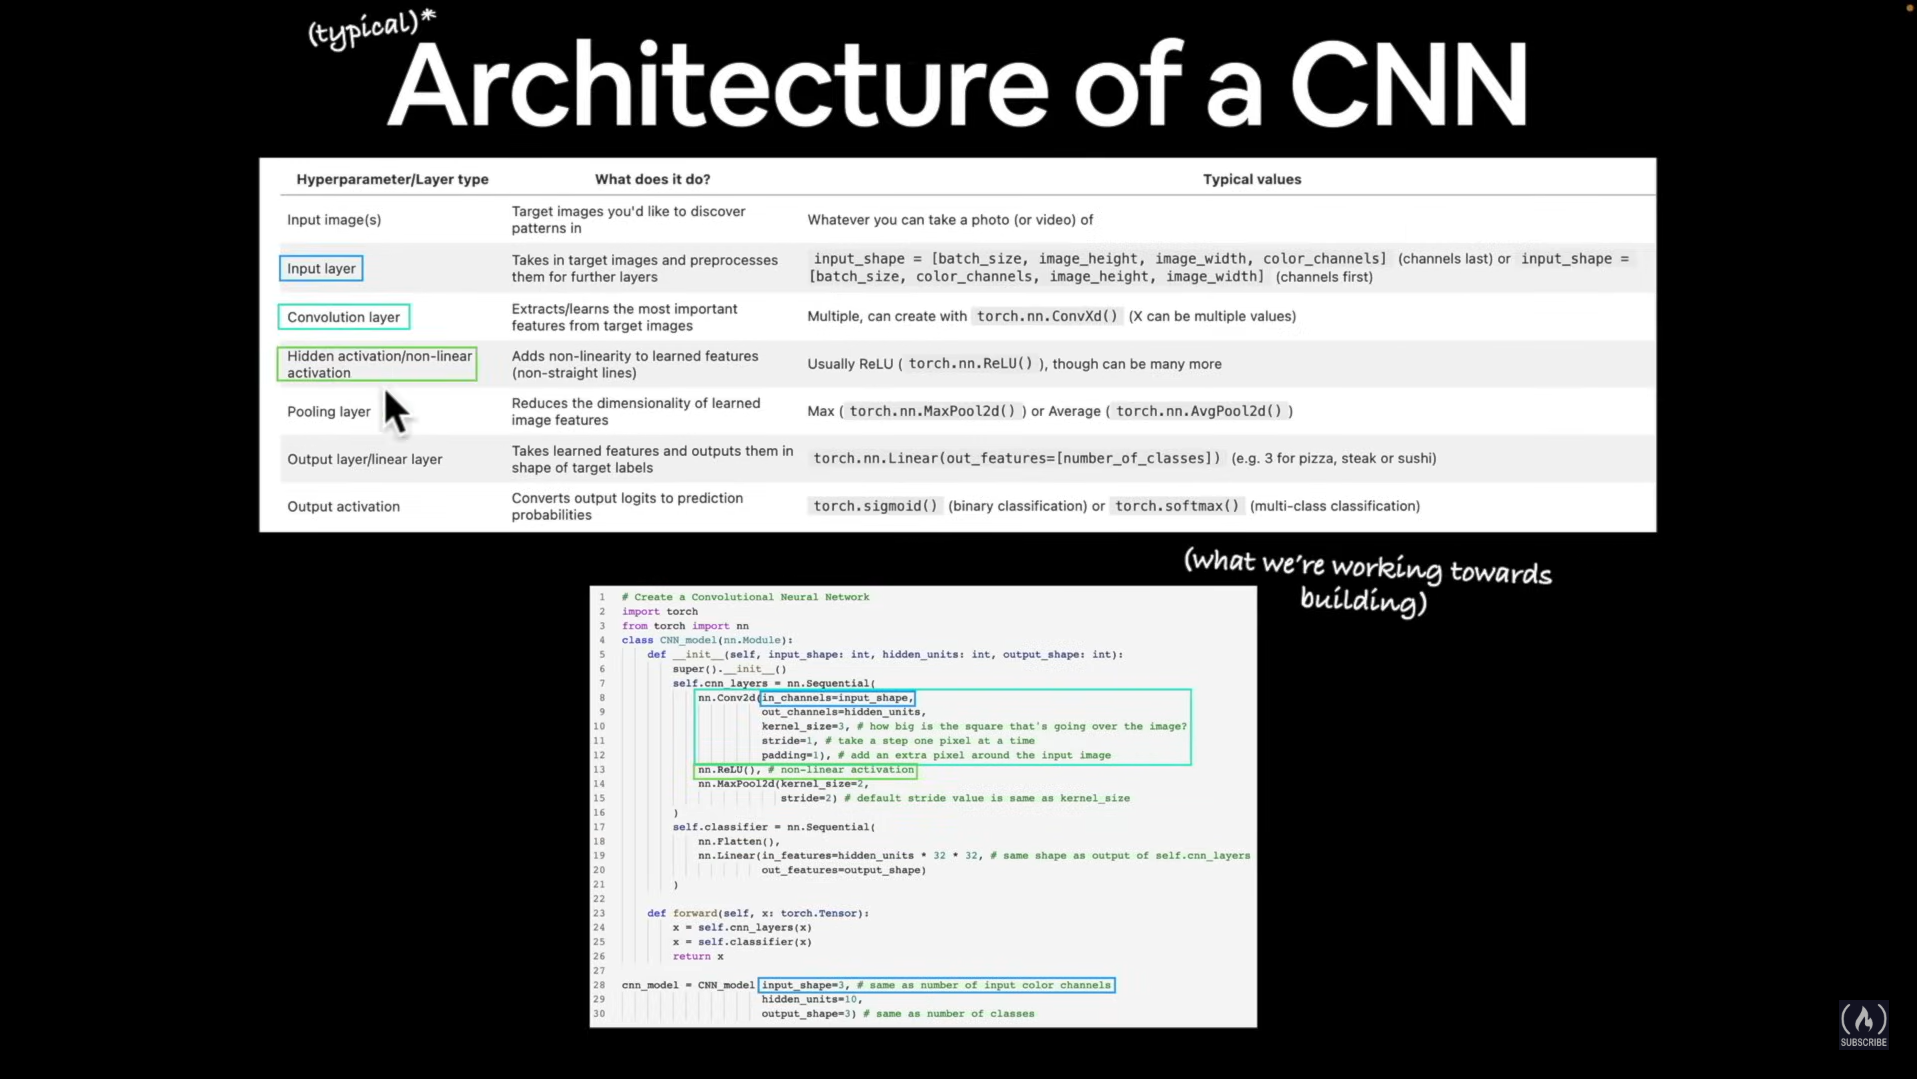

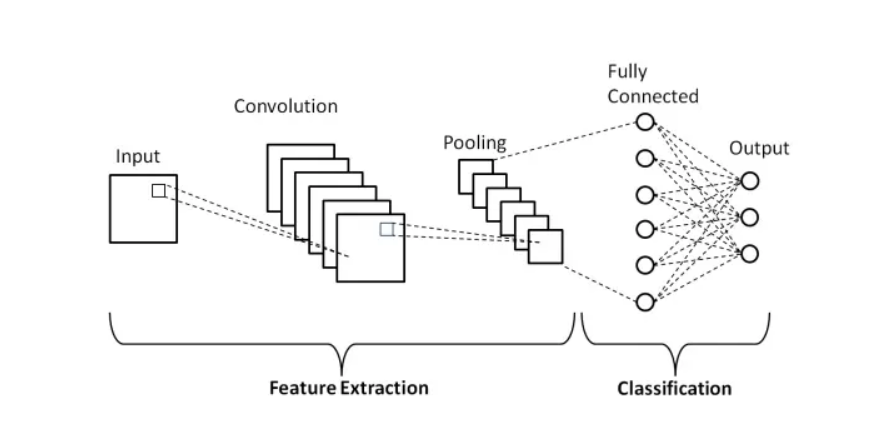

## Computer vision libraries

- `torchvision` : base domain library for PyTorch computer vision
- `torchvision.datasets` : get datasets and data loading functions for computer vision
- `torchvision.models` : get pretrained computer vision models
- `torchvision.transforms` : functions for manipulating your vision data (images) to be suitable for use with an ML MODEL
- `torch.utils.data.Dataset` : Base dataset class for PyTorch
- `torch.utils.data.DataLoader` : Creates a Python iterable over a dataset

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Getting dataset

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .
MNIST is often referred to as the "Hello World" dataset of computer vision due to its common use in introductory machine learning and deep learning tutorials and for benchmarking classification algorithms

MNIST - Modified National Institute of Standards and Technology

- We will use fashion MNIST dataset from torchvision.dataset to start

- Note: A lot of the datasets that you find in torchvision.datasets have been formatted into training dataset and testing dataset already

### Setup training data

In [3]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to download data to?
    train = True , # do we want training dataset
    download = True , # do we want to download
    transform = torchvision.transforms.ToTensor() , # how do we transform data?
    target_transform = None # how do we transform the labels/target
)

test_data  = datasets.FashionMNIST(
    root="data",
    train=False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.92MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.89MB/s]


- Check out files now , data file should be present

In [4]:
len(train_data) , len(test_data)

(60000, 10000)